<a href="https://colab.research.google.com/github/blue1335/Steps-on-ML/blob/main/ML_Intro2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iqr Ile Outlier Detection

Warning!: #btw if you can not see docstring pls tab on space anymore not shift + tab :)

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv("/content/data_with_nans.csv")

In [6]:
df.head()


,Unnamed: 0,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,1,4.7,3.2,1.6,0.2,Iris-setosa
2,2,2,4.9,3.1,1.5,0.1,Iris-setosa
3,3,3,4.4,2.9,1.4,0.2,Iris-setosa
4,4,4,5.0,3.4,1.5,0.2,Iris-setosa


In [7]:
df=df.drop("Unnamed: 0",axis=1)

In [9]:
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,4.7,3.2,1.6,0.2,Iris-setosa
2,2,4.9,3.1,1.5,0.1,Iris-setosa
3,3,4.4,2.9,1.4,0.2,Iris-setosa
4,4,5.0,3.4,1.5,0.2,Iris-setosa


In [12]:
df["SepalLengthCm"]

0      5.1
1      4.7
2      4.9
3      4.4
4      5.0
      ... 
165    5.7
166    6.8
167    6.4
168    7.2
169    6.3
Name: SepalLengthCm, Length: 170, dtype: float64

In [13]:
df.isna().sum()

Id               0
SepalLengthCm    3
SepalWidthCm     1
PetalLengthCm    4
PetalWidthCm     2
Species          0
dtype: int64

In [14]:
for column in df.columns[1:-1]:
  df[column].fillna(value=df[column].mean(),inplace=True) #ortalamayla doldur nan lari

In [30]:
  df.isna().sum() #--->KontrolÜ

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [31]:
#nan degerler uctu! :)

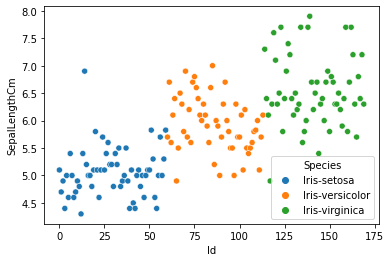

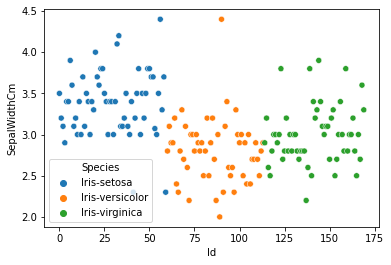

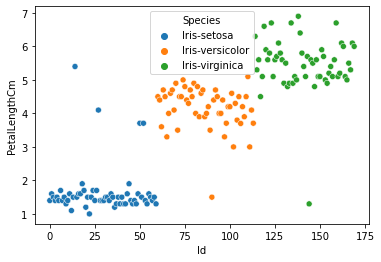

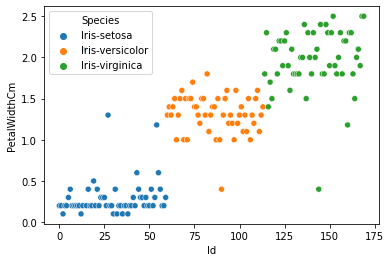

In [33]:
for column in df.columns[1:-1]:

  sns.scatterplot(data=df,x="Id",y=column,hue="Species")
  plt.show()

#btw if you can nıot see docstring pls tab on space anymore not shift + tab :)




In [37]:
for column in df.columns[1:-1]:
  for spec in df["Species"].unique():
    sel=df[df["Species"]==spec]
    sel_column=sel[column]



    q1=sel_column.quantile(0.25)
    q3=sel_column.quantile(0.75)
    iqr=q3-q1
    min=q1-(1.5*iqr)
    max=q3+(1.5*iqr)


    print(column,spec,min,max)


    max_i=df[(df["Species"]==spec)& (df[column]>max)].index

    min_i=df[(df["Species"]==spec)& (df[column]<min)].index
    #index olarak basilcak sonuclar: 
    print(max_i)
    print(min_i)

    df.drop(index=max_i,inplace=True)
    df.drop(index=min_i,inplace=True)

SepalLengthCm Iris-setosa 4.162499999999999 5.862500000000002
Int64Index([14], dtype='int64')
Int64Index([], dtype='int64')
SepalLengthCm Iris-versicolor 4.549999999999999 7.35
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
SepalLengthCm Iris-virginica 5.15 7.950000000000001
Int64Index([], dtype='int64')
Int64Index([117], dtype='int64')
SepalWidthCm Iris-setosa 2.2749999999999995 4.4750000000000005
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
SepalWidthCm Iris-versicolor 1.8124999999999998 3.7125000000000004
Int64Index([90], dtype='int64')
Int64Index([], dtype='int64')
SepalWidthCm Iris-virginica 2.1999999999999993 3.8000000000000007
Int64Index([144], dtype='int64')
Int64Index([], dtype='int64')
PetalLengthCm Iris-setosa 1.0999999999999996 1.9000000000000004
Int64Index([27, 50, 52], dtype='int64')
Int64Index([22], dtype='int64')
PetalLengthCm Iris-versicolor 2.8500000000000005 5.6499999999999995
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Pet

In [ ]:
#min alti ve max ustu atılcak

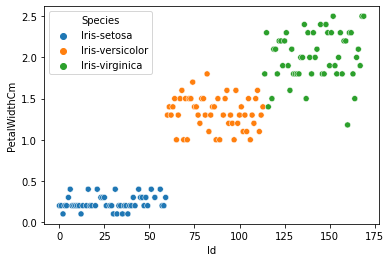

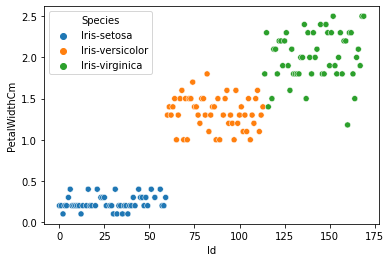

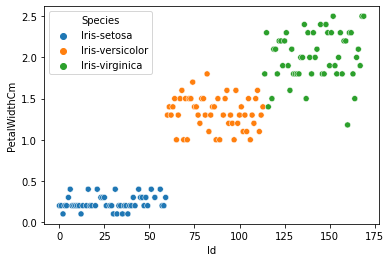

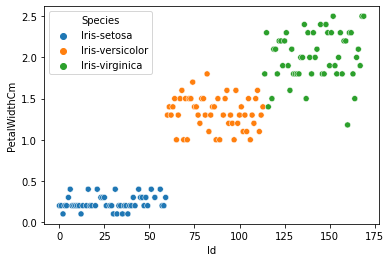

In [40]:
for columns in df.columns[1:-1]:

  sns.scatterplot(data=df,x="Id",y=column,hue="Species")
  plt.show()

In [41]:
#bazilari gitmemis std sapma kaynaklı olabilir bu!

In [42]:
df.to_csv("final.csv")